---

<h1><center>SDSE Homework 3 <br><br> Problem 1: Using SVD for Image Compression </center></h1>

---

In [37]:
result = {
    'SID': 3036429331 # enter your SID
}

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

The next cell will load the image `X` from a file and plot it using `plt.imshow`. 

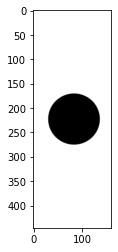

In [39]:
# Load the data from a pickle file
with open('circle_data.pickle', 'rb') as file:
    X = pickle.load(file)   
    
# Display the data matrix as an image
plt.imshow(X,cmap='gray')

# 1) Data dimensions

Record the number of rows and columns of `X` in variables `N` and `D` respectively.

In [40]:
N = X.shape[0] # Add your code here
D = X.shape[1] # Add your code here

In [41]:
################################
# Reporting. Do not modify.#####
result['N'] = N
result['D'] = D
################################

# 2) Run SVD
This has already be done for you. We are using the implementation of SVD from scipy's `linalg` package. Look at the documentation for `linalg.svd` (eg run `linalg.svd?`) to understand the syntax.

In [42]:
from scipy import linalg
U, s, Vt = linalg.svd(X)
U.shape, s.shape, Vt.shape

((446, 446), (160,), (160, 160))

# 3) Matrix rank
Compute the rank of X using `np.linalg.matrix_rank`. Record it to the variable `rank`.

In [43]:
# Add your code here
rank = np.linalg.matrix_rank(X)

In [44]:
################################
# Reporting. Do not modify.#####
result['rank'] = rank
################################

# 4) Plot the singular values
Use `plt.semilogy` to plot the sequence of singular values.

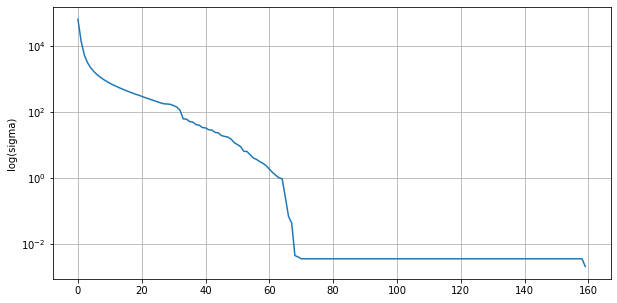

In [45]:
fig4 = plt.figure(figsize=(10,5))
# Add your code here
plt.semilogy(s)
plt.ylabel('log(sigma)')
plt.grid()

In [46]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4
################################

# 5) Plot first 20 columns of $U \Sigma$ using `plt.imshow`

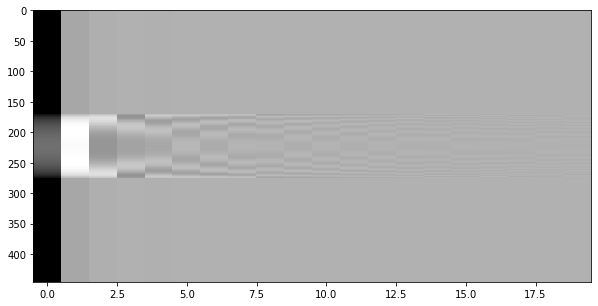

In [47]:
fig5 = plt.figure(figsize=(10,5))
r = 20

# Add your code here
s_mat = np.zeros((446, 160))
s_mat[:160, :160] = np.diag(s)
s_mat.shape
temp = U@s_mat
U.shape, s_mat.shape
plt.imshow(temp[:, :r], cmap='gray', aspect='auto', interpolation='none')

In [48]:
################################
# Reporting. Do not modify.#####
result['fig5'] = fig5
################################

# 6) Plot first 20 rows of $\Sigma V^T$ using `plt.imshow`

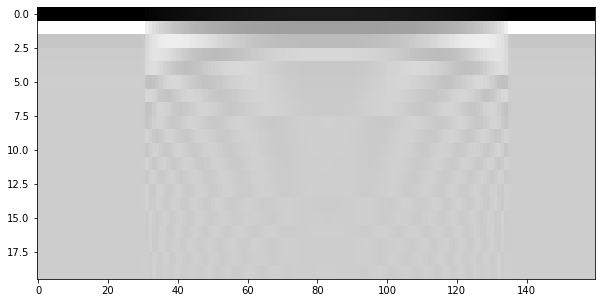

In [49]:
fig6 = plt.figure(figsize=(10,5))
r = 20

# Add your code here
temp = s_mat@Vt
plt.imshow(temp[:r, :], cmap='gray', aspect='auto', interpolation='none')

In [50]:
################################
# Reporting. Do not modify.#####
result['fig6'] = fig6
################################

# 7) Plot the compressed images for r=2, r=5, r=50

Plot each one with `ax[i].imshow` with `i` varying from 0 to 2, so that the images appear in a row.


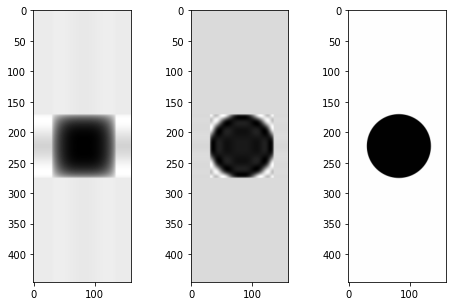

In [51]:
fig7, ax = plt.subplots(figsize=(8,5),nrows=1,ncols=3)

# Add you code here.
rs = [2, 5, 50]
for i in range(len(rs)):
    r = rs[i]
    temp = U[:, :r] @ s_mat[:r, :r] @ Vt[:r, :]
    ax[i].imshow(temp, cmap='gray')

In [52]:
################################
# Reporting. Do not modify.#####
result['fig7'] = fig7
################################

# 8) Plot the percent information retained (sum of singular values) vs $r$

In [53]:
# np.cumsum(s)
a = [1, 2, 3]
np.cumsum(a)

array([1, 3, 6])

Text(0, 0.5, 'Variance preserved')

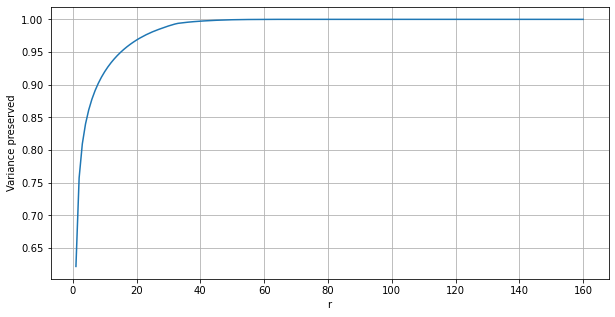

In [54]:
fig8 = plt.figure(figsize=(10,5))

# Add you code here
x = np.linspace(1, 160, 160)
y = np.cumsum(s) / s.sum()

plt.plot(x, y)
plt.grid()
plt.xlabel('r')
plt.ylabel('Variance preserved')

In [55]:
################################
# Reporting. Do not modify.#####
result['fig8'] = fig8
################################

# 9) How many columns should be kept to preserve 90% of the  variance?
Record your answer as `cols90`

In [56]:
for cols, preserved_variance in zip(x, y):
    if preserved_variance >= 0.9:
        break
cols90 = cols   # Add you code here
cols90

8.0

In [57]:
################################
# Reporting. Do not modify.#####
result['cols90'] = cols90
################################

---
## Do not modify below this

In [58]:
with open('hw3_prob1_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)